# Medal Ceremony Notebook
This notebook contains code for handling of the logfiles from the medal ceremony during the cross country world championships 


Need to add one hour to the timestamps because the script used for logging operated with a different time zone

Divide downlink and uplink speeds to get results in Mbps

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('../logfiles/medalceremony/2025.02.26.csv')
df2 = pd.read_csv('../logfiles/medalceremony/2025.02.27.csv')
df3 = pd.read_csv('../logfiles/medalceremony/2025.02.28.csv')
df4 = pd.read_csv('../logfiles/medalceremony/2025.03.01.csv')
df5 = pd.read_csv('../logfiles/medalceremony/2025.03.02.csv')
df6 = pd.read_csv('../logfiles/medalceremony/2025.03.03.csv')
df7 = pd.read_csv('../logfiles/medalceremony/2025.03.04.csv')
df8 = pd.read_csv('../logfiles/medalceremony/2025.03.05.csv')
df9 = pd.read_csv('../logfiles/medalceremony/2025.03.06.csv')

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9]  

for df in dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp']) + pd.Timedelta(hours=1)
    df['download'] = df['download'] / 1000000
    df['upload'] = df['upload'] / 1000000
    

We want to filter the dataframes to get only measurements in time interval

In [14]:
# Filter DataFrames
dfs_filtered = [df[(df['timestamp'].dt.hour >= 17) & (df['timestamp'].dt.hour < 23)] for df in dfs]

In [15]:
titles = ["February 26th 2025","February 27th 2025", "February 28th 2025", "March 1st 2025", "March 2nd 2025", "March 3rd 2025", "March 4th 2025", "March 5th 2025", "March 6th 2025"]

for i, df_filtered in enumerate(dfs_filtered, start=0):
    print(f"Mean downlink speeds {titles[i]}: {round(np.mean(df_filtered['download']),1)} Mbps")
for i, df_filtered in enumerate(dfs_filtered, start=0):
    print(f"Mean uplink speeds {titles[i]}: {round(np.mean(df_filtered['upload']),1)} Mbps")

Mean downlink speeds February 26th 2025: 299.5 Mbps
Mean downlink speeds February 27th 2025: 296.5 Mbps
Mean downlink speeds February 28th 2025: 314.2 Mbps
Mean downlink speeds March 1st 2025: 240.8 Mbps
Mean downlink speeds March 2nd 2025: 300.9 Mbps
Mean downlink speeds March 3rd 2025: 317.5 Mbps
Mean downlink speeds March 4th 2025: 281.7 Mbps
Mean downlink speeds March 5th 2025: 260.8 Mbps
Mean downlink speeds March 6th 2025: 267.8 Mbps
Mean uplink speeds February 26th 2025: 98.1 Mbps
Mean uplink speeds February 27th 2025: 104.3 Mbps
Mean uplink speeds February 28th 2025: 107.5 Mbps
Mean uplink speeds March 1st 2025: 100.6 Mbps
Mean uplink speeds March 2nd 2025: 110.1 Mbps
Mean uplink speeds March 3rd 2025: 115.8 Mbps
Mean uplink speeds March 4th 2025: 104.5 Mbps
Mean uplink speeds March 5th 2025: 108.7 Mbps
Mean uplink speeds March 6th 2025: 105.0 Mbps


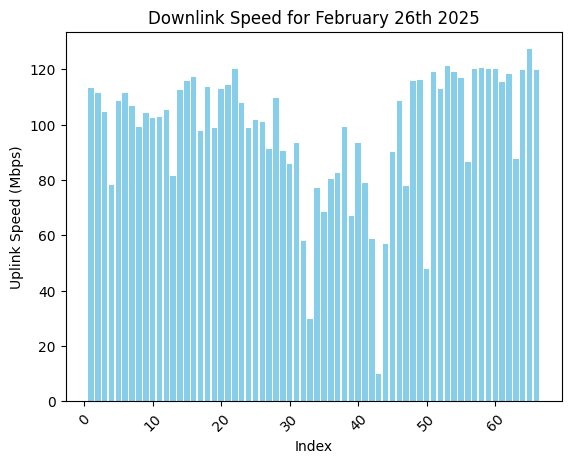

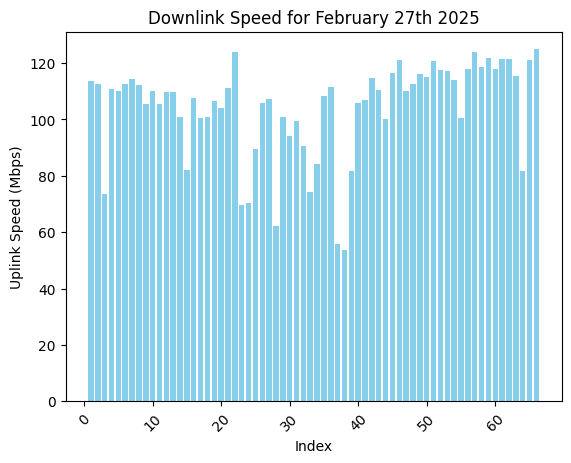

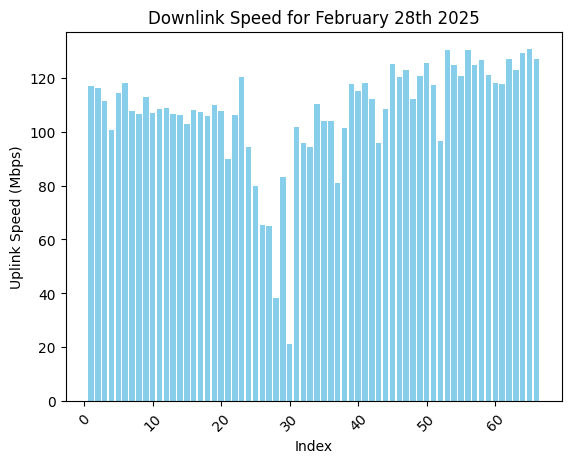

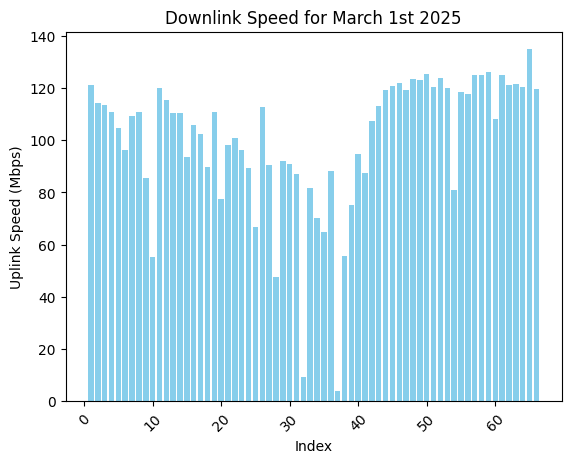

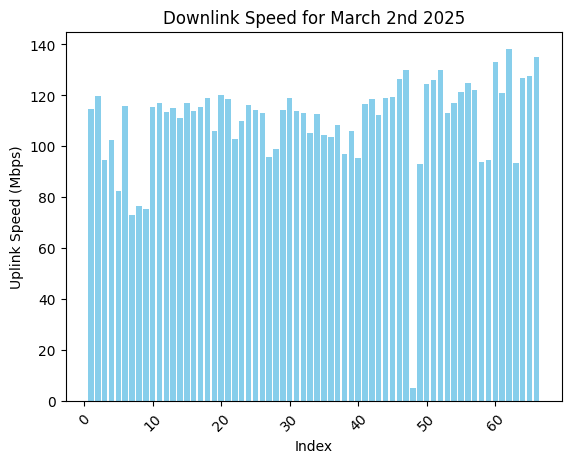

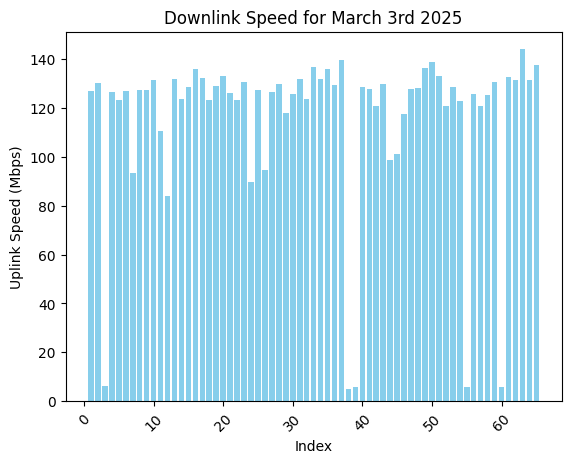

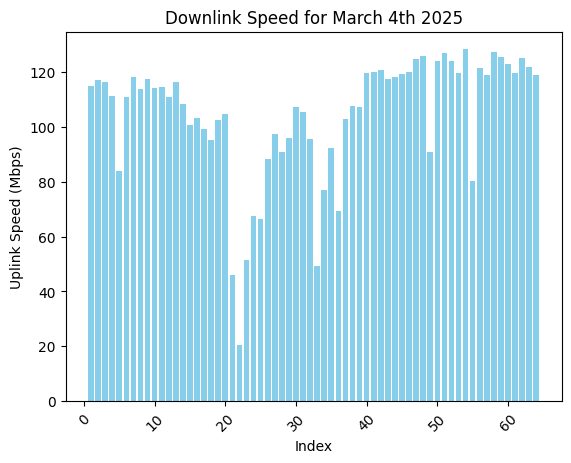

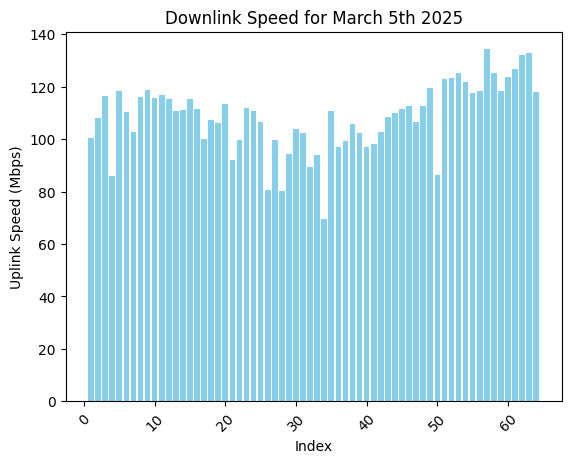

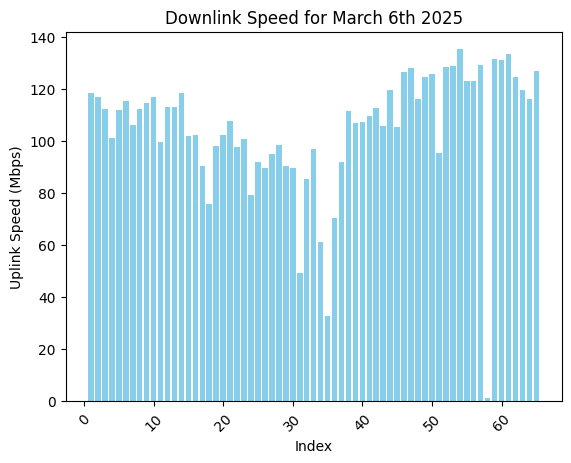

In [16]:
titles = ["February 26th 2025","February 27th 2025", "February 28th 2025", "March 1st 2025", "March 2nd 2025", "March 3rd 2025", "March 4th 2025", "March 5th 2025", "March 6th 2025"]
for i, df_filtered in enumerate(dfs_filtered, start=0):
    plt.bar(range(1, len(df_filtered) + 1), df_filtered["upload"], color='skyblue')
    plt.xlabel('Index')
    plt.ylabel('Uplink Speed (Mbps)')
    plt.title(f'Downlink Speed for {titles[i]}')
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_11880\169634626.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled["time"] = df_sampled["timestamp"].dt.strftime("%H:%M:%S")
C:\Users\thoma\AppData\Local\Temp\ipykernel_11880\169634626.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled["time"] = df_sampled["timestamp"].dt.strftime("%H:%M:%S")
C:\Users\thoma\AppData\Local\Temp\ipykernel_11880\169634626.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

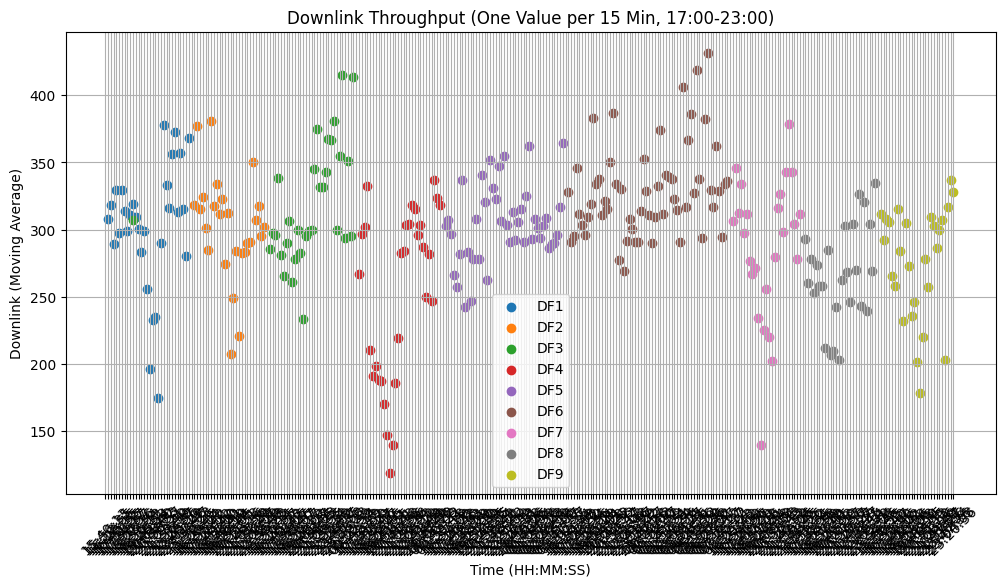

In [26]:
window_size = 3

# Create a plot
plt.figure(figsize=(12, 6))

for i, df in enumerate(dfs, 1):
    # Ensure timestamps are in correct datetime format
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    
    # Apply moving average
    df["moving_avg"] = df["download"].rolling(window=window_size).mean()

    # Select every third row to get 15-minute intervals (since data is every 5 min)
    df_sampled = df.iloc[::3, :]

    # Extract only the time for x-axis
    df_sampled["time"] = df_sampled["timestamp"].dt.strftime("%H:%M:%S")

    # Scatter plot for discrete values
    plt.scatter(df_sampled["time"], df_sampled["moving_avg"], label=f"DF{i}")

plt.xlabel("Time (HH:MM:SS)")
plt.ylabel("Downlink (Moving Average)")
plt.title("Downlink Throughput (One Value per 15 Min, 17:00-23:00)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()